<a href="https://colab.research.google.com/github/pronit007/cancer_data_analysis/blob/main/CANCER_DATA_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('/content/global_cancer_patients_2015_2024.csv')

In [3]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
# no null values


In [5]:
# no duplicates

data.duplicated().sum()


np.int64(0)

Descriptive analysis

In [6]:
data['Age']

,Age
0,71
1,34
2,80
3,40
4,43
...,...
49995,80
49996,40
49997,74
49998,21


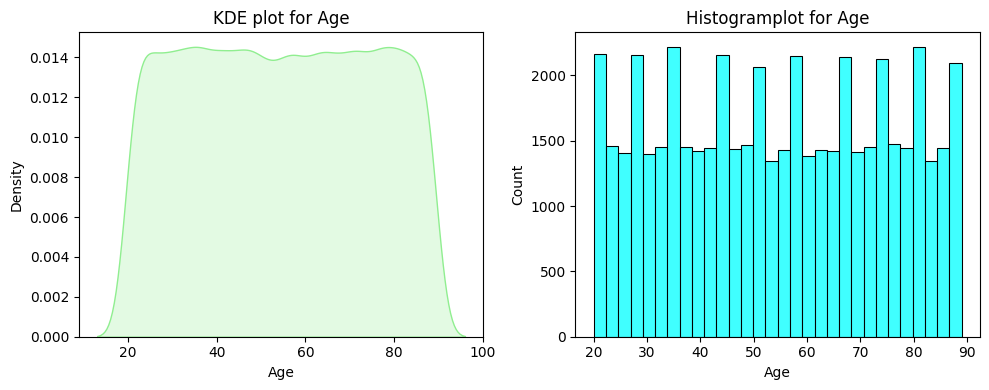

In [7]:
# ploting for Age column

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data['Age'],fill=True,color='lightgreen')
plt.title('KDE plot for Age')
plt.subplot(1,2,2)
sns.histplot(data['Age'],bins=30,kde=False,color='cyan')
plt.title('Histogramplot for Age')
plt.tight_layout()
plt.show()

In [8]:
data['Age'].describe()

,Age
count,50000.000000
mean,54.421540
std,20.224451
min,20.000000
25%,37.000000
50%,54.000000
75%,72.000000
max,89.000000


In [9]:
# INFERENCE

#Range : 20 to 89  Years
#Mean Age: 54.42 years
#Standard Deviation : 20.22
#IQR: 37 to 72  years

#it's suggest a board representation of both young and elderly patients in the dataset , which supports age-based comarative analysis

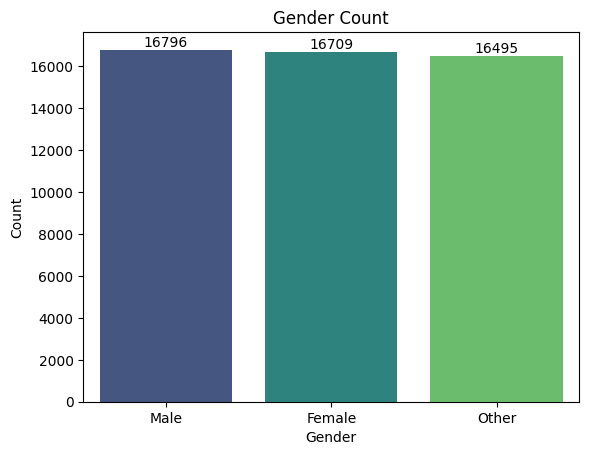

In [10]:
data['Gender'].value_counts()

sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values,palette='viridis')
for i, v in enumerate(data['Gender'].value_counts().values):
    plt.text(i, v, str(v), ha='center',va='bottom')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
# data['Gender'].value_counts()
# this dataset contains three gender categories(Male,Female,other) whit the common being Male (16,796 records)
#Gender Distribution is sufficient for evaluating gender-specific survival trends and severity outcomes.


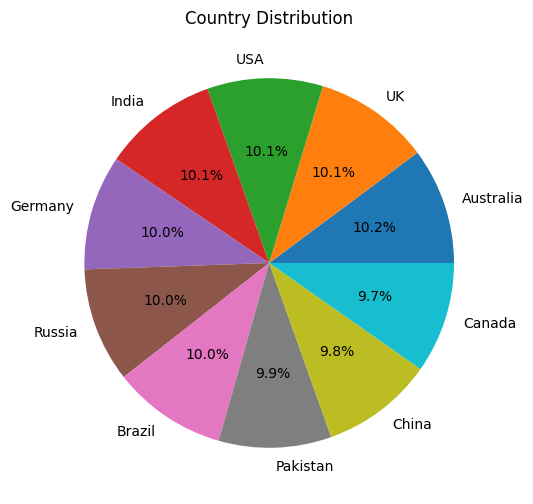

In [12]:
country_counts=data['Country_Region'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(x=country_counts.values,labels=country_counts.index,autopct='%1.1f%%')
plt.title('Country Distribution')
plt.show()

#

In [13]:
country_counts

,count
Country_Region,
Australia,5092
UK,5060
USA,5060
India,5040
Germany,5024
Russia,5017
Brazil,5004
Pakistan,4926
China,4913


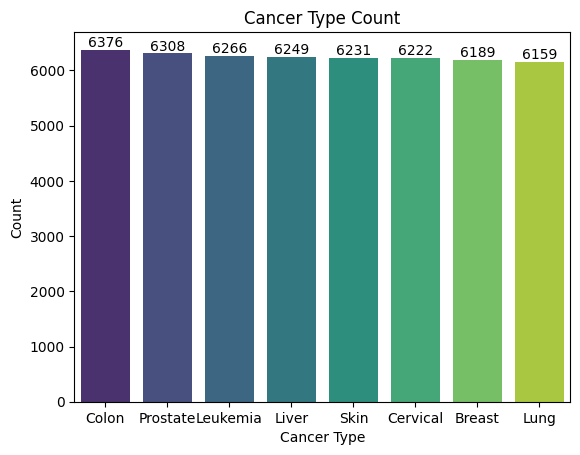

In [14]:
data['Cancer_Type'].value_counts()

sns.barplot(x=data['Cancer_Type'].value_counts().index,y=data['Cancer_Type'].value_counts().values,palette='viridis')
for i, v in enumerate(data['Cancer_Type'].value_counts().values):
    plt.text(i, v, str(v), ha='center',va='bottom')
plt.title('Cancer Type Count')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.show()

# we have in total 8 type of cancer , with each cancer having approx same number of data points under the lable , most common cancer are colon cancer followed by prostate cancer

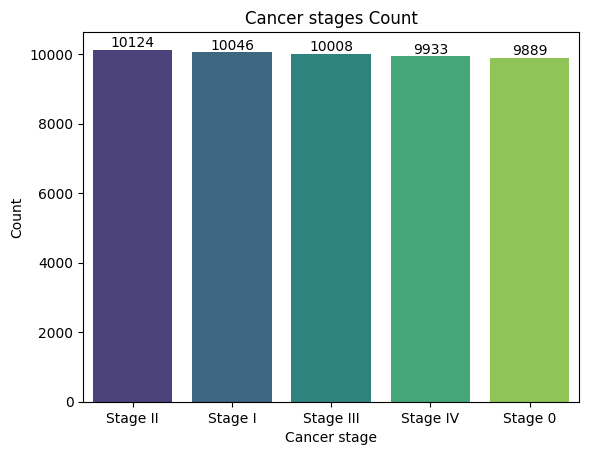

In [15]:
# cancer stage have 5 stages with values ranging from 0 to  4 , with stage 2 the most common one , and each stage have almost same number of data points under its lable.

data['Cancer_Stage'].value_counts()

data['Cancer_Stage'].value_counts()

sns.barplot(x=data['Cancer_Stage'].value_counts().index,y=data['Cancer_Stage'].value_counts().values,palette='viridis')
for i, v in enumerate(data['Cancer_Stage'].value_counts().values):
    plt.text(i, v, str(v), ha='center',va='bottom')
plt.title('Cancer stages Count')
plt.xlabel('Cancer stage')
plt.ylabel('Count')
plt.show()



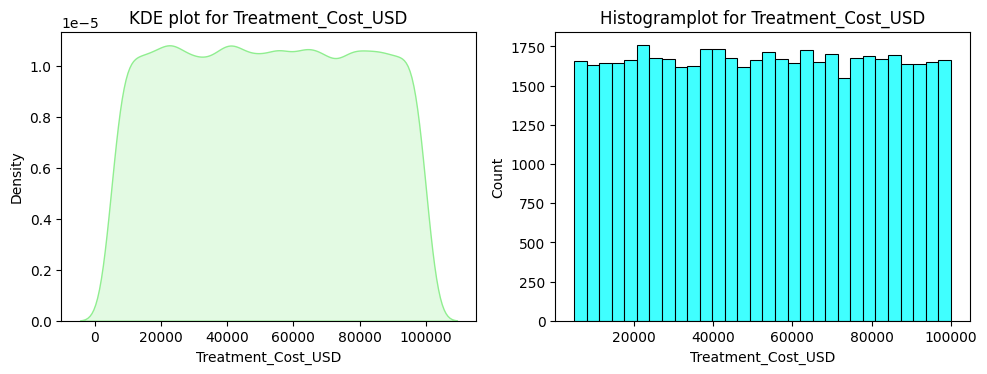

In [16]:
# plotting for treatment cost
data['Treatment_Cost_USD']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data['Treatment_Cost_USD'],fill=True,color='lightgreen')
plt.title('KDE plot for Treatment_Cost_USD')
plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'],bins=30,kde=False,color='cyan')
plt.title('Histogramplot for Treatment_Cost_USD')
plt.tight_layout()
plt.show()

In [17]:
data['Treatment_Cost_USD'].describe()

# treatment_cost_usd have no skewness . and there are almost same number of data points under each bin as observed by histrogram

,Treatment_Cost_USD
count,50000.000000
mean,52467.298239
std,27363.229379
min,5000.050000
25%,28686.225000
50%,52474.310000
75%,76232.720000
max,99999.840000


In [18]:
column_of_interest = ['Genetic_Risk', 'Smoking', 'Alcohol_Use', 'Air_Pollution','Obesity_Level']
summary=data[column_of_interest].describe()
# The user wants to see only 'count', 'mean', 'max', and 'min' rows from the descriptive statistics.
# These are index labels, not column names, so we use .loc to select them.
print(summary.loc[['std', 'mean', 'max', 'min']])

# these varibles have nearly identical means and standdard deviation , indicating they were likely designed on the same standardized scale. they are essential in studying interaction effects on servival.

      Genetic_Risk    Smoking  Alcohol_Use  Air_Pollution  Obesity_Level
std       2.885773   2.881579     2.888769       2.888399       2.894504
mean      5.001698   4.989826     5.010880       5.010126       4.991176
max      10.000000  10.000000    10.000000      10.000000      10.000000
min       0.000000   0.000000     0.000000       0.000000       0.000000



# Determine the relationship between risk factors and cancer severity

In [19]:
import statsmodels.api as sm
import pandas as pd

# 1. Define Features & Target
X_all = data[['Genetic_Risk','Smoking','Alcohol_Use','Air_Pollution','Obesity_Level']]
y_target = data['Target_Severity_Score']

X_const_all = sm.add_constant(X_all)
print(X_const_all)


# 3. Fit OLS Model for all features (initial model)
model_all = sm.OLS(y_target, X_const_all).fit()


# Intercept (constant term) for the full model
intercept = model_all.params['const']
print("Intercept Value:", intercept)

# Slopes (coefficients for each factor) for the full model
slopes = model_all.params.drop('const')
print("\nSlopes (Coefficients):\n", slopes)


# R-squared for individual factors
r2_values = {}

for factor in X_all.columns:
    X_single_factor = data[[factor]]              # only one predictor
    X_const_single_factor = sm.add_constant(X_single_factor)    # add intercept

    model_single_factor = sm.OLS(y_target, X_const_single_factor).fit()

    r2_values[factor] = model_single_factor.rsquared

r2_table = pd.DataFrame({
    "Risk_Factor": r2_values.keys(),
    "R2_Value": r2_values.values()
})

print("\nR-squared:", r2_table)

# Standard Errors (from the full model)
std_error = model_all.bse
print("\nstd_error:", std_error)

# p-values (from the full model)
p_values = model_all.pvalues
print("\np_values:", p_values)


# the r2_squar value of each factors are relatively low , ranging between 0 to 0.23 this indicate the relation between risk_factors and target_severity_score is weak . these factors do not expalin much of the variation in the target_variable

       const  Genetic_Risk  Smoking  Alcohol_Use  Air_Pollution  Obesity_Level
0        1.0           6.4      0.9          9.5            2.8            8.7
1        1.0           1.3      3.9          3.7            4.5            6.3
2        1.0           7.4      4.7          2.4            7.9            0.1
3        1.0           1.7      3.5          4.8            2.9            2.7
4        1.0           5.1      6.7          2.3            2.8            0.5
...      ...           ...      ...          ...            ...            ...
49995    1.0           2.3      3.8          2.8            7.5            2.9
49996    1.0           6.4      9.0          2.9            3.5            9.8
49997    1.0           6.2      4.7          8.7            1.6            4.0
49998    1.0           4.0      8.6          7.6            6.5            8.1
49999    1.0           5.1      0.0          3.2            9.8            0.7

[50000 rows x 6 columns]
Intercept Value: 0.9280473

In [20]:
print(model_all .summary())

                              OLS Regression Results                             
Dep. Variable:     Target_Severity_Score   R-squared:                       0.792
Model:                               OLS   Adj. R-squared:                  0.792
Method:                    Least Squares   F-statistic:                 3.806e+04
Date:                   Wed, 10 Dec 2025   Prob (F-statistic):               0.00
Time:                           17:27:39   Log-Likelihood:                -40802.
No. Observations:                  50000   AIC:                         8.162e+04
Df Residuals:                      49994   BIC:                         8.167e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

# Analyze the proportion of early_stage diagnoses by cancer type

In [21]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [22]:
stage_count=data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
sum_stage_0_1 = stage_count.loc[stage_count.index.isin(['Stage 0', 'Stage I'])].sum()
total_no_of_stage_sum=stage_count.sum()
proportion_of_stage_0_1=(sum_stage_0_1/total_no_of_stage_sum)*100
print(f"proportion of early_stage diagnoses by cancer type: {proportion_of_stage_0_1}")

proportion of early_stage diagnoses by cancer type: 38.43156356551388


In [23]:
stage_count=data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
sum_stage_0_1 = stage_count.loc[stage_count.index.isin(['Stage 0', 'Stage I'])].sum()
total_no_of_stage_sum=stage_count.sum()
proportion_of_stage_0_1=(sum_stage_0_1/total_no_of_stage_sum)*100
print(f"proportion of early_stage diagnoses by cancer type: {proportion_of_stage_0_1}")

proportion of early_stage diagnoses by cancer type: 39.53080114905841


In [24]:
stage_count=data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
sum_stage_0_1 = stage_count.loc[stage_count.index.isin(['Stage 0', 'Stage I'])].sum()
total_no_of_stage_sum=stage_count.sum()
proportion_of_stage_0_1=(sum_stage_0_1/total_no_of_stage_sum)*100
print(f"proportion of early_stage diagnoses by cancer type: {proportion_of_stage_0_1}")

proportion of early_stage diagnoses by cancer type: 39.47325900791727


In [25]:
def early_stage_proportion(data, cancer_type):

    stage_count = data[data["Cancer_Type"] == cancer_type]["Cancer_Stage"].value_counts()
    early_stage_sum = stage_count.loc[stage_count.index.isin(['Stage 0', 'Stage I'])].sum()
    total_sum = stage_count.sum()
    proportion = (early_stage_sum / total_sum) * 100

    return proportion

print(" Cancer Types:", data["Cancer_Type"].unique())

user_input = input("Enter the cancer type: ")

# Calculate proportion
result = early_stage_proportion(data, user_input)

print(f"proportion of early_stage diagnoses by cancer type '{user_input}': {result} %")


 Cancer Types: ['Lung' 'Leukemia' 'Breast' 'Colon' 'Skin' 'Cervical' 'Prostate' 'Liver']
Enter the cancer type: Skin
proportion of early_stage diagnoses by cancer type 'Skin': 40.41084898090194 %


# Identify the key Predictors of cancer severity and survival years

In [26]:
features=['Age','Genetic_Risk', 'Smoking', 'Alcohol_Use', 'Air_Pollution','Obesity_Level']
target=["Survival_Years",'Target_Severity_Score']

# calculate correlations

pearson_corr=data[features+target].corr(method='pearson')
spearman_corr=data[features+target].corr(method='spearman')

In [27]:
# i need the target column relationship
pearson_results=pearson_corr[target]
pearson_results

,Survival_Years,Target_Severity_Score
Age,-0.000147,-0.001481
Genetic_Risk,0.001708,0.478700
Smoking,0.001371,0.484420
Alcohol_Use,-0.000527,0.363250
Air_Pollution,0.000893,0.366963
Obesity_Level,0.009771,0.251366
Survival_Years,1.000000,0.004161
Target_Severity_Score,0.004161,1.000000


In [28]:
spearman_result=spearman_corr[target]
spearman_result


,Survival_Years,Target_Severity_Score
Age,-0.000149,-0.002076
Genetic_Risk,0.001684,0.472193
Smoking,0.001372,0.477881
Alcohol_Use,-0.000543,0.354694
Air_Pollution,0.000841,0.357528
Obesity_Level,0.009780,0.243152
Survival_Years,1.000000,0.003431
Target_Severity_Score,0.003431,1.000000


In [29]:
#combine both

# Correlation With Survival Years (Pearson & Spearman)----> Almost every variable has correlation values between –0.001 and +0.01 with Survival_Years.this means there is no such factor are there which can predict the survival_years
# Correlation With Target Severity Score (Pearson & Spearman)----> risk factors has modarate to high correlation
pd.concat([pearson_results,spearman_result],axis=1,keys=["Pearson","Spearman"])

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Smoking                     0.001371              0.484420       0.001372   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Air_Pollution               0.000893              0.366963       0.000841   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Smoking                            0.477881  
Alcohol_Use                        0.354694  
Air_Pollution                      0.357528  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [30]:
# Random forest for target_severity_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#Converting categorical columns into numerical columns:

cat_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

print("Label encoding completed!")
print(data[cat_cols].head())

Label encoding completed!
   Gender  Country_Region  Cancer_Type  Cancer_Stage
0       1               8            5             3
1       1               3            3             0
2       1               6            0             2
3       1               8            2             1
4       0               1            7             3


In [31]:
#  Random forest for target_severity_score
# prepare features and input
X=data.drop(columns=['Target_Severity_Score','Survival_Years','Treatment_Cost_USD','Survival_Years','Patient_ID'])
y=data['Target_Severity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor( n_estimators=300,max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)
rf.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = rf.predict(X_test)
# Predictions on the training set
y_train_pred = rf.predict(X_train)

test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("R² Score (Test Set):", test_r2)
print("R² Score (Train Set):", train_r2)

R² Score (Test Set): 0.7686160945581656
R² Score (Train Set): 0.9692278716073492


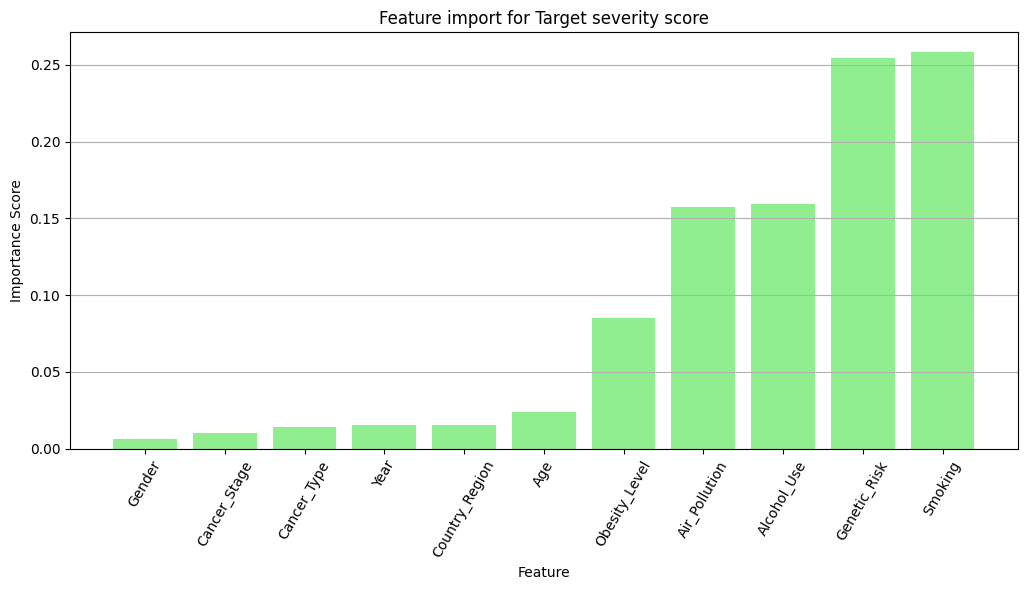

In [33]:
fi = pd.DataFrame({"Feature": X.columns,"Importance": rf.feature_importances_}).sort_values(by="Importance", ascending=True)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.bar(fi["Feature"],fi["Importance"],color='lightgreen')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature import for Target severity score")
plt.grid(True,axis='y')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [34]:
#  Random forest for survival_years.
# in this case model performing very poor perfomance

#Converting categorical columns into numerical columns:

cat_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])


X_data=data.drop(columns=['Target_Severity_Score','Survival_Years','Treatment_Cost_USD','Survival_Years','Patient_ID'])
y_data=data['Survival_Years']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

rf = RandomForestRegressor( n_estimators=300,max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)
rf.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = rf.predict(X_test)
# Predictions on the training set
y_train_pred = rf.predict(X_train)

test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("R² Score (Test Set):", test_r2)
print("R² Score (Train Set):", train_r2)

R² Score (Test Set): -0.016487968443587908
R² Score (Train Set): 0.8605835865266899


<Axes: xlabel='Survival_Years', ylabel='Count'>

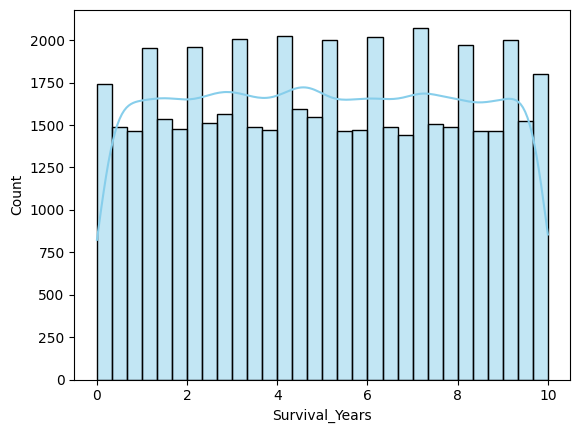

In [39]:
import seaborn as sns
sns.histplot(data['Survival_Years'],bins=30,kde=True,color='skyblue')

# this means our target variable is uniformly distributed

In [40]:
data.corr(numeric_only=True)['Survival_Years'].sort_values(ascending= True)
# this information does't help the model figure out how someone will survive

,Survival_Years
Gender,-0.007121
Cancer_Stage,-0.003014
Cancer_Type,-0.001717
Alcohol_Use,-0.000527
Treatment_Cost_USD,-0.000429
Age,-0.000147
Year,0.000018
Air_Pollution,0.000893
Smoking,0.001371
Genetic_Risk,0.001708


# Explore the economic burden of cancer treatment across different demographics and countries

In [41]:
data=pd.read_csv('/content/global_cancer_patients_2015_2024.csv')
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [42]:
data['Age_Group']=pd.cut(data['Age'],bins=[0,30,45,60,75,100],labels=["0-30","31-45","46-60","61-75","76+"])
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76+
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


In [43]:
# average cancer treatment cost by country and gender with different age group

country_gender_cost=data.groupby(['Country_Region','Age_Group','Gender'])['Treatment_Cost_USD'].mean().reset_index()
country_gender_cost

,Country_Region,Age_Group,Gender,Treatment_Cost_USD
0,Australia,0-30,Female,53287.701319
1,Australia,0-30,Male,52939.875035
2,Australia,0-30,Other,53776.208452
3,Australia,31-45,Female,51647.694000
4,Australia,31-45,Male,54212.453438
...,...,...,...,...
145,USA,61-75,Male,55381.892304
146,USA,61-75,Other,52070.474766
147,USA,76+,Female,51877.032768
148,USA,76+,Male,52445.346342


In [44]:
country_age_cost= data.groupby(['Country_Region','Age_Group'])['Treatment_Cost_USD'].mean().reset_index()
country_age_cost

,Country_Region,Age_Group,Treatment_Cost_USD
0,Australia,0-30,53315.916090
1,Australia,31-45,52290.210149
2,Australia,46-60,50887.310424
3,Australia,61-75,51827.812279
4,Australia,76+,54922.283170
5,Brazil,0-30,53814.974610
6,Brazil,31-45,53178.611181
7,Brazil,46-60,52650.893070
8,Brazil,61-75,51854.086124
9,Brazil,76+,51448.451094


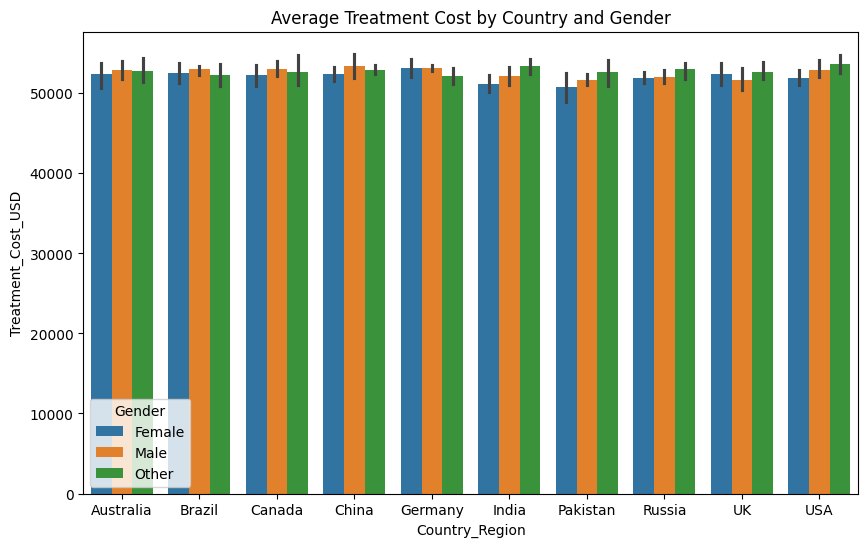

In [52]:
country_gender_cost=data.groupby(['Country_Region','Age_Group','Gender'])['Treatment_Cost_USD'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=country_gender_cost,x='Country_Region',y='Treatment_Cost_USD',hue='Gender')
plt.title('Average Treatment Cost by Country and Gender')
plt.show()

In [47]:
heatmap_data = country_age_cost.pivot(index='Country_Region', columns='Age_Group', values='Treatment_Cost_USD')

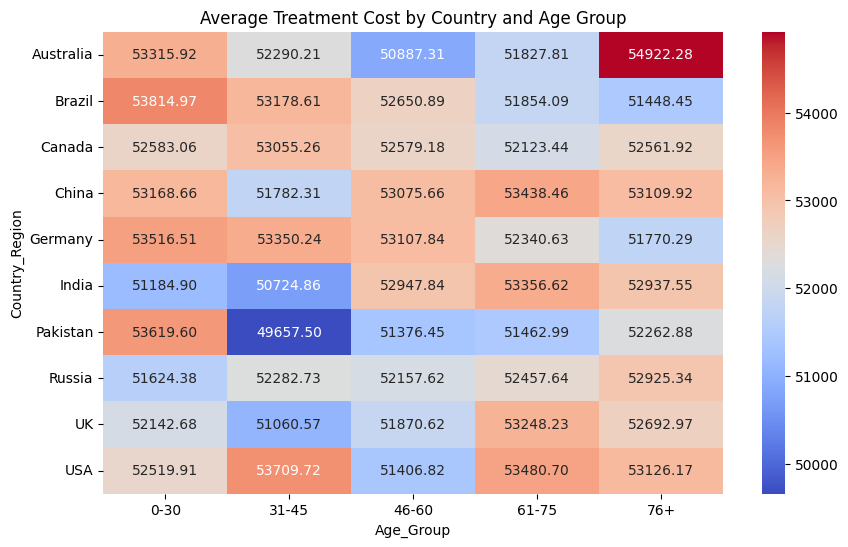

In [48]:
# in this plot we creat a inferance for different different demographics for cancer treatment cost
#cancer treatment costs are higher in devloped nations such as USA,Australi,China menwhile countries like india and pakisthan has lower cost

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Average Treatment Cost by Country and Age Group')
plt.show()

# Assess whether higher treatment cost is assiociated with longer survival

Null Hypothesis(H0): There is no correlation between treatment cost and survival years

Alternative Hypithesis(H1): there is a correlation (possitive or negative ) between treatment cost and survival years .



In [55]:
# we use scipy.stas because in this model we can get the p_values
from scipy.stats import pearsonr,spearmanr
x=data["Treatment_Cost_USD"]
y=data["Survival_Years"]

# performing pearson correlation test
pearson_corr,p_value=pearsonr(x,y)
print("pearson_corr:",pearson_corr)
print("p_value:",p_value)

# performing spearman correlation test
spearman_corr,p_value_spearman=spearmanr(x,y)
print("spearman_corr:",spearman_corr)
print("p_value_spearman:",p_value_spearman)

# in this two test there is no correlation exits between treatmnt_cost and survival_year

alpha=0.05
def interpret_results(corr,p,method):
  if p< alpha:
    print(f"{method},we reject the null hypothesis")
  else:
    print(f"{method},we fail to reject the null hypothesis")

interpret_results(pearson_corr,p_value,"pearson")
interpret_results(spearman_corr,p_value_spearman,"spearman")

pearson_corr: -0.00042940542830214993
p_value: 0.9235082012963275
spearman_corr: -0.0004454737292549569
p_value_spearman: 0.9206551702014918
pearson,we fail to reject the null hypothesis
spearman,we fail to reject the null hypothesis


# Evaluate if higher cancer stages lead to greater treatment cost and reduced survival years

In [59]:
df=data.copy()

In [62]:
stage_order=['Stage 0','Stage I','Stage II','Stage III','Stage IV']


In [63]:
grouped_states=df.groupby('Cancer_Stage')[['Treatment_Cost_USD','Survival_Years']].mean().reset_index()

In [64]:
grouped_states

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


# Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity

In [72]:
# From this interaction effect between genetic risk amd smoking on survival yeaes is not significant.
# genetic risk does not amplify or alter the effect of smoking
# in this case we do multiple linear regression by OLS method

import statsmodels.formula.api as smf

model = smf.ols(formula='Target_Severity_Score ~ Genetic_Risk*Smoking',data=data).fit()
model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

,Genetic_Risk:Smoking
Coef.,-0.000228
Std.Err.,0.000471
t,-0.484187
P>|t|,0.628255
[0.025,-0.001150
0.975],0.000694


here p-valu = 0.628 which is > 0.5  & interaction coffecient is less than 0  so in this case we failed the null hypothesis